# Graduate Rotational Internship Program (GRIP)

Name : Harish Seenivasan

Title : Prediction using Supervised ML

Level : Beginner

Batch : May

# Step 1 : Data Collection

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 2 : Understanding the Data

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 3 : Checking Nulls

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 4 : Data Visualization

Scatter Plot

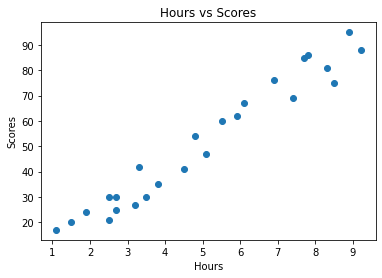

In [6]:
# Plotting the distribution of scores
plt.scatter(data['Hours'],data['Scores'])  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

To see the relation between the data we use the correlation function and using this correlation function we then plot a 
heat map to see whether the data is properly correlated or not.

In [7]:
cor = data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


HeatMap

<AxesSubplot:>

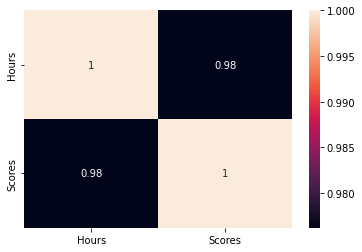

In [8]:
sns.heatmap(cor, annot=True)

# Step 5 : Model Building 

Preparing Data

In [12]:
X = data.iloc[:, 0:1]
Y = data.iloc[:,-1:]

In [13]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [14]:
Y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts 
with 80%-20%. One part of the data is used to build the machine learning model, and is called the training data 
(i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test
data(i.e. X_test, y_test).

X is having independent variables.

Y is having dependent variable.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Here we are using Linear Regression model to predict our data After that fitting/training the model on X_train and Y_train using .fit() method.

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

Best-Fit Line

Text(0, 0.5, 'Scores')

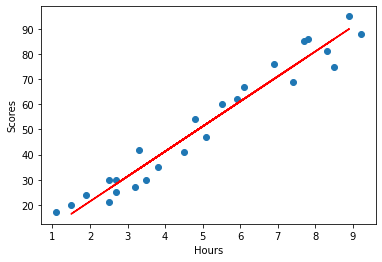

In [18]:
plt.scatter(data['Hours'],data['Scores'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")

Then we are predicting on X_test using .predict() method.

Model Evaluation.

In [19]:
y_pred = lr.predict(X_test)

In [34]:
lr.predict([[9.25]])

array([[93.45860056]])

Calculating Slope

In [35]:
b = lr.intercept_
b

array([1.50791048])

In [37]:
m = lr.coef_
m

array([[9.94061514]])

In [38]:
# y = mx + b
m *9.25 + b

array([[93.45860056]])

Checking accuracy how the model is accurate or how it is properly working on given data.

In [39]:
from sklearn.metrics import accuracy_score
lr.score(X_test,Y_test)

0.9735538080811826

For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the scores in the given dataset.